In [1]:
import numpy as np
from scipy.stats import t

In [2]:
import matplotlib.pyplot as plt

In [3]:
mean = np.linspace(0.7, 0.0, 8)
cov = np.array([[round(0.6**abs(i-j)*((-1.01)**(i+j)), 3) for j in range(8)] for i in range(8)])
beta = np.linspace(-0.8, 1.0, 10)
df = 10

In [4]:
mean

array([0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ])

In [5]:
cov

array([[ 1.   , -0.606,  0.367, -0.223,  0.135, -0.082,  0.05 , -0.03 ],
       [-0.606,  1.02 , -0.618,  0.375, -0.227,  0.138, -0.083,  0.051],
       [ 0.367, -0.618,  1.041, -0.631,  0.382, -0.232,  0.14 , -0.085],
       [-0.223,  0.375, -0.631,  1.062, -0.643,  0.39 , -0.236,  0.143],
       [ 0.135, -0.227,  0.382, -0.643,  1.083, -0.656,  0.398, -0.241],
       [-0.082,  0.138, -0.232,  0.39 , -0.656,  1.105, -0.669,  0.406],
       [ 0.05 , -0.083,  0.14 , -0.236,  0.398, -0.669,  1.127, -0.683],
       [-0.03 ,  0.051, -0.085,  0.143, -0.241,  0.406, -0.683,  1.149]])

In [6]:
def is_symmetric_positive_definite(matrix):
    # Check if matrix is square
    if matrix.shape[0] != matrix.shape[1]:
        return False
    
    # Check if matrix is symmetric
    if not np.allclose(matrix, matrix.T):
        return False
    
    # Check if all eigenvalues are positive
    eigenvalues, _ = np.linalg.eig(matrix)
    if np.all(eigenvalues > 0):
        return True
    else:
        return False


if is_symmetric_positive_definite(cov):
    print("Matrix is symmetric positive definite")
else:
    print("Matrix is not symmetric positive definite")

Matrix is symmetric positive definite


In [7]:
beta

array([-0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ])

In [6]:
F = lambda z: 1.0 / (1.0 + np.exp(-z))   # standard logistic function

In [7]:
# Propensity score
m_0 = lambda x: t.cdf(x @ beta, df)

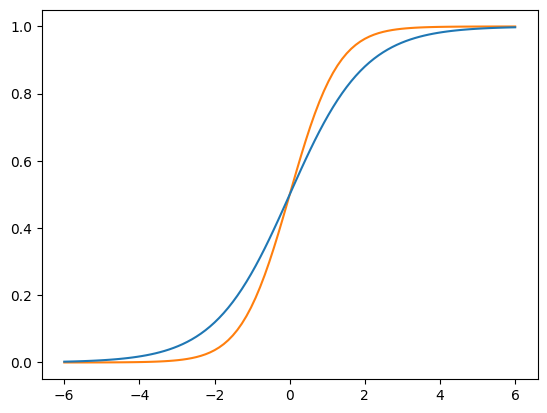

In [13]:
grid = np.linspace(-6,6,100)
plt.plot(grid, t.cdf(grid, df), color='tab:orange')
plt.plot(grid, F(grid), color='tab:blue')

In [15]:
rng = np.random.default_rng(seed=42)

In [87]:
N=1
x_normal = rng.multivariate_normal(mean=mean, cov=cov, size=N)
x_uniform = rng.uniform(size=(N,2))
x_data = np.concatenate((x_normal, x_uniform), axis=1)

xi = rng.standard_t(df=df, size=N)
d_data = (x_data @ beta + xi >= 0).astype(float)

x_data @ beta
#u = rng.normal(scale=np.mean(np.abs(x_data), axis=-1))
#np.abs(u).min()

array([0.80078387])

In [12]:
gamma = np.array([1.0, 2.0, 2.0, 3.0])

In [45]:
# Outcome regression function
def g_0(d, x):
    if x.ndim == 1:
        x = x.reshape(1,-1)
    linear_part = x[:,:4] @ gamma + x[:,4]*(d+1)
    nonlinear_part = F(x[:,5])*x[:,6]**2 - x[:,8]*(np.sqrt(x[:,9])+2*x[:,6]) + d*x[:,2]*x[:,8]**(3/2)
    return linear_part + nonlinear_part

In [46]:
# Generate a data set of size N in vectorized fashion
def get_data(N, rng):
    x_normal = rng.multivariate_normal(mean=mean, cov=cov, size=N)
    x_uniform = rng.uniform(size=(N,2))
    x_data = np.concatenate((x_normal, x_uniform), axis=1)

    xi = rng.standard_t(df=df, size=N)
    d_data = (x_data @ beta + xi >= 0).astype(float)
        
    u = rng.normal(scale=np.mean(np.abs(x_data), axis=-1))
    y_data = g_0(d_data, x_data) + u 

    return y_data, d_data, x_data

In [159]:
m_0(x_data[0:100])

array([0.8539501 , 0.32878347, 0.58508406, 0.81077854, 0.27852843,
       0.40627513, 0.59307328, 0.2932166 , 0.46239994, 0.81087837,
       0.55606281, 0.70180508, 0.14456997, 0.43809969, 0.45101082,
       0.02171024, 0.28601615, 0.13663009, 0.10969166, 0.86393564,
       0.05589518, 0.38312123, 0.11681539, 0.51756928, 0.13743693,
       0.71647133, 0.22419159, 0.00569095, 0.45133647, 0.24402958,
       0.38334865, 0.11881109, 0.8996622 , 0.09098797, 0.11653502,
       0.93916672, 0.23909507, 0.75738336, 0.02158091, 0.09555551,
       0.04687922, 0.16718688, 0.41722814, 0.23147101, 0.60058039,
       0.27852474, 0.72763329, 0.01063704, 0.46995617, 0.61977064,
       0.16521881, 0.96583949, 0.59762121, 0.24170582, 0.17030685,
       0.00188219, 0.55317539, 0.76102941, 0.60334044, 0.76305286,
       0.21689893, 0.05097276, 0.44701906, 0.15297931, 0.51980805,
       0.03048762, 0.24365166, 0.76969763, 0.6867611 , 0.09729806,
       0.39139792, 0.96759507, 0.70813765, 0.05761069, 0.88112

In [18]:
from dml_algorithm import mm_ate

In [125]:
%%time
N=1000
y_data, d_data, x_data = get_data(N, rng)
#mm_att(y_data, d_data, x_data, g_0, m_0)
np.mean(g_0(1, x_data[d_data==1]) - g_0(0, x_data[d_data==1]))

CPU times: total: 0 ns
Wall time: 3.99 ms


0.43534980484294106

In [126]:
hi = []
hii = []
for i in range(5000):
    y_data, d_data, x_data = get_data(N, rng)
    hi.append(mm_att(y_data, d_data, x_data, g_0, m_0))
    hii.append(np.mean(g_0(1, x_data[d_data==1]) - g_0(0, x_data[d_data==1])))

(array([3.28184008e-03, 1.09394669e-03, 3.06305074e-02, 6.22455669e-01,
        3.10133888e+00, 1.60481980e+00, 1.01737043e-01, 2.18789339e-03,
        1.09394669e-03, 1.09394669e-03]),
 array([-0.47664723, -0.29382296, -0.1109987 ,  0.07182557,  0.25464983,
         0.4374741 ,  0.62029836,  0.80312263,  0.98594689,  1.16877116,
         1.35159542]),
 <BarContainer object of 10 artists>)

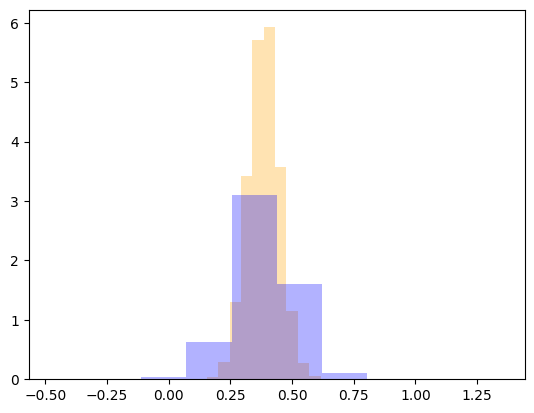

In [127]:
plt.hist(hii, density=True, color='orange', alpha=0.3)
plt.hist(hi, density=True, color='blue', alpha=0.3)

In [538]:
np.mean(y_data[d_data==1]) - np.mean(y_data[d_data==0])

-0.1780821364130869

In [21]:
def mm_att(y_data, d_data, x_data, g_0, m_0):
    return np.mean(d_data*(y_data-g_0(0, x_data)) - m_0(x_data)*(1-d_data)*(y_data-g_0(0, x_data))/(1-m_0(x_data))) / np.mean(d_data)

In [139]:
def xgb_cv(y_data, d_data, x_data, cv=5):
    xgb_model_g = xgb.XGBRegressor(objective='reg:squarederror')
    xgb_model_m = xgb.XGBClassifier(objective='binary:logistic')

    param_grid = {
        'n_estimators': [5, 50, 100, 200],
        'max_depth': [3, 5],
        'subsample': [0.7],
        'learning_rate': [0.01, 0.05, 0.1],
        'reg_lambda': [0.1, 1, 100]
    }

    grid_search_g = GridSearchCV(estimator=xgb_model_g, param_grid=param_grid, cv=cv, n_jobs=-1,
                                 scoring='neg_mean_squared_error')
    grid_search_m = GridSearchCV(estimator=xgb_model_m, param_grid=param_grid, cv=cv, n_jobs=-1,
                                 scoring='neg_brier_score')

    xgb_params_dict = {}
    for d in [0, 1]:
        grid_search_g.fit(X=x_data[d_data == d], y=y_data[d_data == d])
        xgb_params_dict[f'g{d}'] = grid_search_g.best_params_
    grid_search_m.fit(X=x_data, y=d_data)
    xgb_params_dict['m'] = grid_search_m.best_params_

    return xgb_params_dict

In [131]:
import sklearn
import xgboost as xgb

from sklearn.model_selection import GridSearchCV

In [140]:
np.random.seed(123)
sample_sizes = [500]
xgb_params_dict_dict = {}

for N in sample_sizes:
    y_data, d_data, x_data = get_data(N, rng)
    xgb_params_dict_dict[N] = xgb_cv(y_data, d_data, x_data)
    print(f'Cross-validation done for N={N}')

Cross-validation done for N=500


In [142]:
xgb_params_dict_dict[500]

{'g0': {'learning_rate': 0.1,
  'max_depth': 3,
  'n_estimators': 200,
  'reg_lambda': 1,
  'subsample': 0.7},
 'g1': {'learning_rate': 0.1,
  'max_depth': 5,
  'n_estimators': 200,
  'reg_lambda': 1,
  'subsample': 0.7},
 'm': {'learning_rate': 0.05,
  'max_depth': 3,
  'n_estimators': 100,
  'reg_lambda': 1,
  'subsample': 0.7}}

In [143]:
from dml_algorithm import dml_ate

In [259]:
import pickle

In [260]:
with open('opt_params_xgboost.pkl', 'rb') as pickle_file:
    xgb_params_dict_dict = pickle.load(pickle_file)

In [261]:
xgb_params_dict = xgb_params_dict_dict[500]

In [277]:
N=1000

In [348]:
%%time
y_data, d_data, x_data = get_data(N, rng)
model_g0, model_g1 = xgb.XGBRegressor(objective='reg:squarederror'), xgb.XGBRegressor(objective='reg:squarederror')
model_g0.set_params(**xgb_params_dict['g0'])
model_g1.set_params(**xgb_params_dict['g1'])
model_g = [model_g0, model_g1]
model_m = xgb.XGBClassifier(objective='binary:logistic')
model_m.set_params(**xgb_params_dict['m'])
dml_ate(y_data, d_data, x_data, model_g, model_m, K=5, classical=True, inference=True, alpha=0.05)

CPU times: total: 10.5 s
Wall time: 2.83 s


(array([ 0.24118497,  0.18376037, -0.68601489]),
 3.286110459327848,
 array([0.03751348, 0.44485647]))

In [160]:
y_data, d_data, x_data = get_data(N, rng)

In [161]:
model_g1.set_params(**xgb_params_dict['g1'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [284]:
model_g1.fit(x_data[d_data==1][:-15], y_data[d_data==1][:-15])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.06, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [306]:
model_g1.predict(x_data[-15:])

array([5.57387246, 4.61558591, 2.46735694, 5.01903946, 3.28921398,
       5.92739041, 2.87384132, 8.42222726, 8.61833464, 6.38487251,
       0.87190871, 3.83341122, 6.96562144, 8.89576079, 4.19074803])

In [307]:
g_0(1, x_data[-15:])

array([4.97595987, 4.17473865, 3.21030066, 4.08773199, 2.29786344,
       6.09356938, 2.27364607, 8.67247317, 8.02690198, 6.44068894,
       0.46386196, 3.92977752, 6.44468426, 8.65474135, 3.90554927])

In [303]:
model_m.set_params(**xgb_params_dict['m'])

ValueError: Invalid parameter 'colsample_bytree' for estimator CalibratedClassifierCV(estimator=LinearSVC(dual=True, max_iter=5000)). Valid parameters are: ['cv', 'ensemble', 'estimator', 'method', 'n_jobs'].

In [308]:
model_m.fit(x_data[:-15], d_data[:-15])
model_m.predict_proba(x_data[-15:])[:,1]

array([0.35677541, 0.44894914, 0.74321763, 0.30715839, 0.73423241,
       0.65619182, 0.42112825, 0.28015634, 0.01074605, 0.29178119,
       0.56912968, 0.85604554, 0.1201455 , 0.14766865, 0.40530372])

In [309]:
m_0(x_data[-15:])

array([0.30202359, 0.47337998, 0.81475602, 0.27476732, 0.78759846,
       0.68723295, 0.48324694, 0.24666842, 0.00484402, 0.23388951,
       0.61079795, 0.85731506, 0.10238421, 0.14018227, 0.40451814])

In [174]:
from sklearn.svm import SVR, SVC, LinearSVR, LinearSVC

In [240]:
from sklearn.calibration import CalibratedClassifierCV

In [289]:
N=1000

In [305]:
%%time
y_data, d_data, x_data = get_data(N, rng)
model_g0, model_g1 = LinearSVR(dual=True), LinearSVR(dual=True)
model_g = [model_g0, model_g1]
model_svc = SVC()#LinearSVC(max_iter=5000, dual=True)
#model_m = CalibratedClassifierCV(model_svc) 
dml_ate(y_data, d_data, x_data, model_g, model_m, K=5, classical=True, inference=True, alpha=0.05)

C:\Users\henry\MA_CausalML\dml\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


CPU times: total: 1.12 s
Wall time: 1.17 s


(array([0.51372019, 0.45808467, 0.12142511]),
 4.502257712063822,
 array([0.23467249, 0.79276789]))

In [311]:
from sklearn.linear_model import LassoCV, RidgeCV, LogisticRegression

In [343]:
%%time
y_data, d_data, x_data = get_data(N, rng)
model_g0, model_g1 = RidgeCV(), RidgeCV()
model_g = [model_g0, model_g1]
model_svc = LogisticRegression()#SVC()#LinearSVC(max_iter=5000, dual=True)
#model_m = CalibratedClassifierCV(model_svc) 
dml_ate(y_data, d_data, x_data, model_g, model_m, K=5, classical=True, inference=True, alpha=0.05)

CPU times: total: 1.22 s
Wall time: 1.24 s


(array([0.70483145, 0.65274795, 0.58961336]),
 3.760958753749441,
 array([0.4717291 , 0.93793381]))